In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Loading the train dataset
df_train=df_train=pd.read_csv("train.csv")
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
# Loading the test datasets
df_test=pd.read_csv("test.csv")
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [6]:
# Combining both datasets in one dataset
df=pd.concat([df_train,df_test])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [7]:
# Analysis of combined dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [8]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [9]:
df.shape

(783667, 12)

In [10]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [11]:
# Data Pre-processing
# Lets Analyze the categorical columns in dataset
# 1) Lets convert Gender into integer form (it help the model to train properly and provide high accuracy)
df["Gender"]=df["Gender"].map({"F":0,"M":1})
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [12]:
# getting unique/common values from age columns
df["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [13]:
# 2) similarly for age lets encode manually them according to groups in 0 to 7
df["Age"]=df["Age"].map({"0-17":1,"18-25":2,"26-35":3,"36-45":4,"46-50":5,"51-55":6,"55+":7})
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [14]:
# 3) similarly for city category column
df["City_Category"].unique()
df["City_Category"]=df["City_Category"].map({"A":1,"B":2,"C":3})
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,1,10,1,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,0,1,10,1,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,0,1,10,1,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,0,1,10,1,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,1,7,16,3,4+,0,8,NaN,NaN,7969.0


In [15]:
#  Missing values
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [16]:
# Replacing the null/missing values of product category 2 and 3
# purchase has test data so we cant change it and remains constant
df["Product_Category_2"]=df["Product_Category_2"].fillna(df["Product_Category_2"].mode()[0])
df["Product_Category_3"]=df["Product_Category_3"].fillna(df["Product_Category_3"].mode()[0])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,1,10,1,2,0,3,8.0,16.0,8370.0
1,1000001,P00248942,0,1,10,1,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,0,1,10,1,2,0,12,8.0,16.0,1422.0
3,1000001,P00085442,0,1,10,1,2,0,12,14.0,16.0,1057.0
4,1000002,P00285442,1,7,16,3,4+,0,8,8.0,16.0,7969.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  int64  
 3   Age                         783667 non-null  int64  
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  int64  
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          783667 non-null  float64
 10  Product_Category_3          783667 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(7), object(2)
memory usage: 77.7+ MB


In [18]:
# lets remove the (+) sign od stay_in_current_city_years column to make it more accurate and avoid error
df["Stay_In_Current_City_Years"]=df["Stay_In_Current_City_Years"].str.replace("+"," ")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,1,10,1,2,0,3,8.0,16.0,8370.0
1,1000001,P00248942,0,1,10,1,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,0,1,10,1,2,0,12,8.0,16.0,1422.0
3,1000001,P00085442,0,1,10,1,2,0,12,14.0,16.0,1057.0
4,1000002,P00285442,1,7,16,3,4,0,8,8.0,16.0,7969.0


In [19]:
# Now lets check is there any other data type rather than integer then it need to converted into int
# lets check so we habe product id.stay in current city years,product category 2 & 3,purchase
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  int64  
 3   Age                         783667 non-null  int64  
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  int64  
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          783667 non-null  float64
 10  Product_Category_3          783667 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(7), object(2)
memory usage: 77.7+ MB


In [20]:
df["Stay_In_Current_City_Years"]=df["Stay_In_Current_City_Years"].astype(int)
df["Product_Category_2"]=df["Product_Category_2"].astype(int)
df["Product_Category_3"]=df["Product_Category_3"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  int64  
 3   Age                         783667 non-null  int64  
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  int64  
 6   Stay_In_Current_City_Years  783667 non-null  int64  
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          783667 non-null  int64  
 10  Product_Category_3          783667 non-null  int64  
 11  Purchase                    550068 non-null  float64
dtypes: float64(1), int64(10), object(1)
memory usage: 77.7+ MB


C:\Users\Sanket\AppData\Local\Temp\ipykernel_19164\2485880472.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=df[:1000],y="Purchase",x="Gender",palette=(["Pink","skyblue"]))


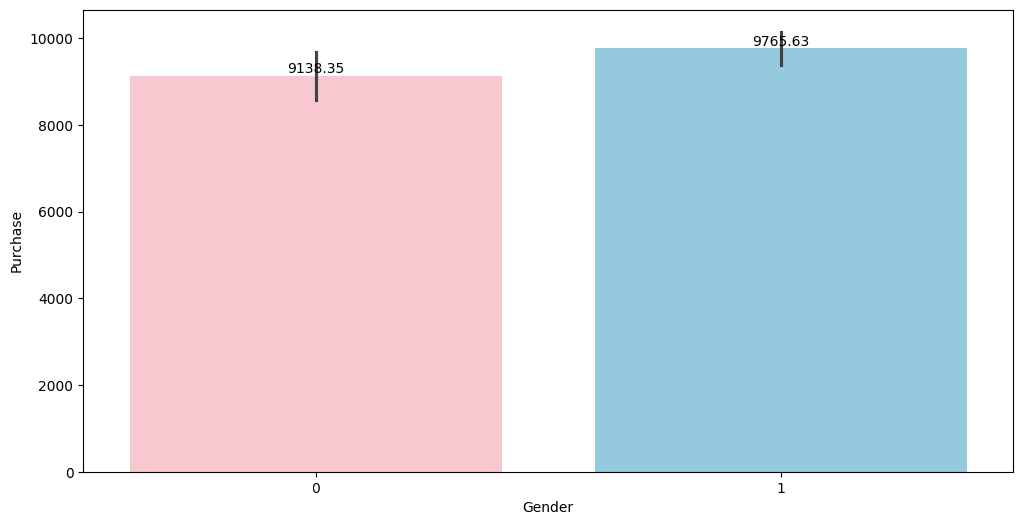

In [21]:
# data visualization
plt.rcParams["figure.figsize"]=(12,6)
ax=sns.barplot(data=df[:1000],y="Purchase",x="Gender",palette=(["Pink","skyblue"]))
for x in ax.containers:
    ax.bar_label(x)
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because n

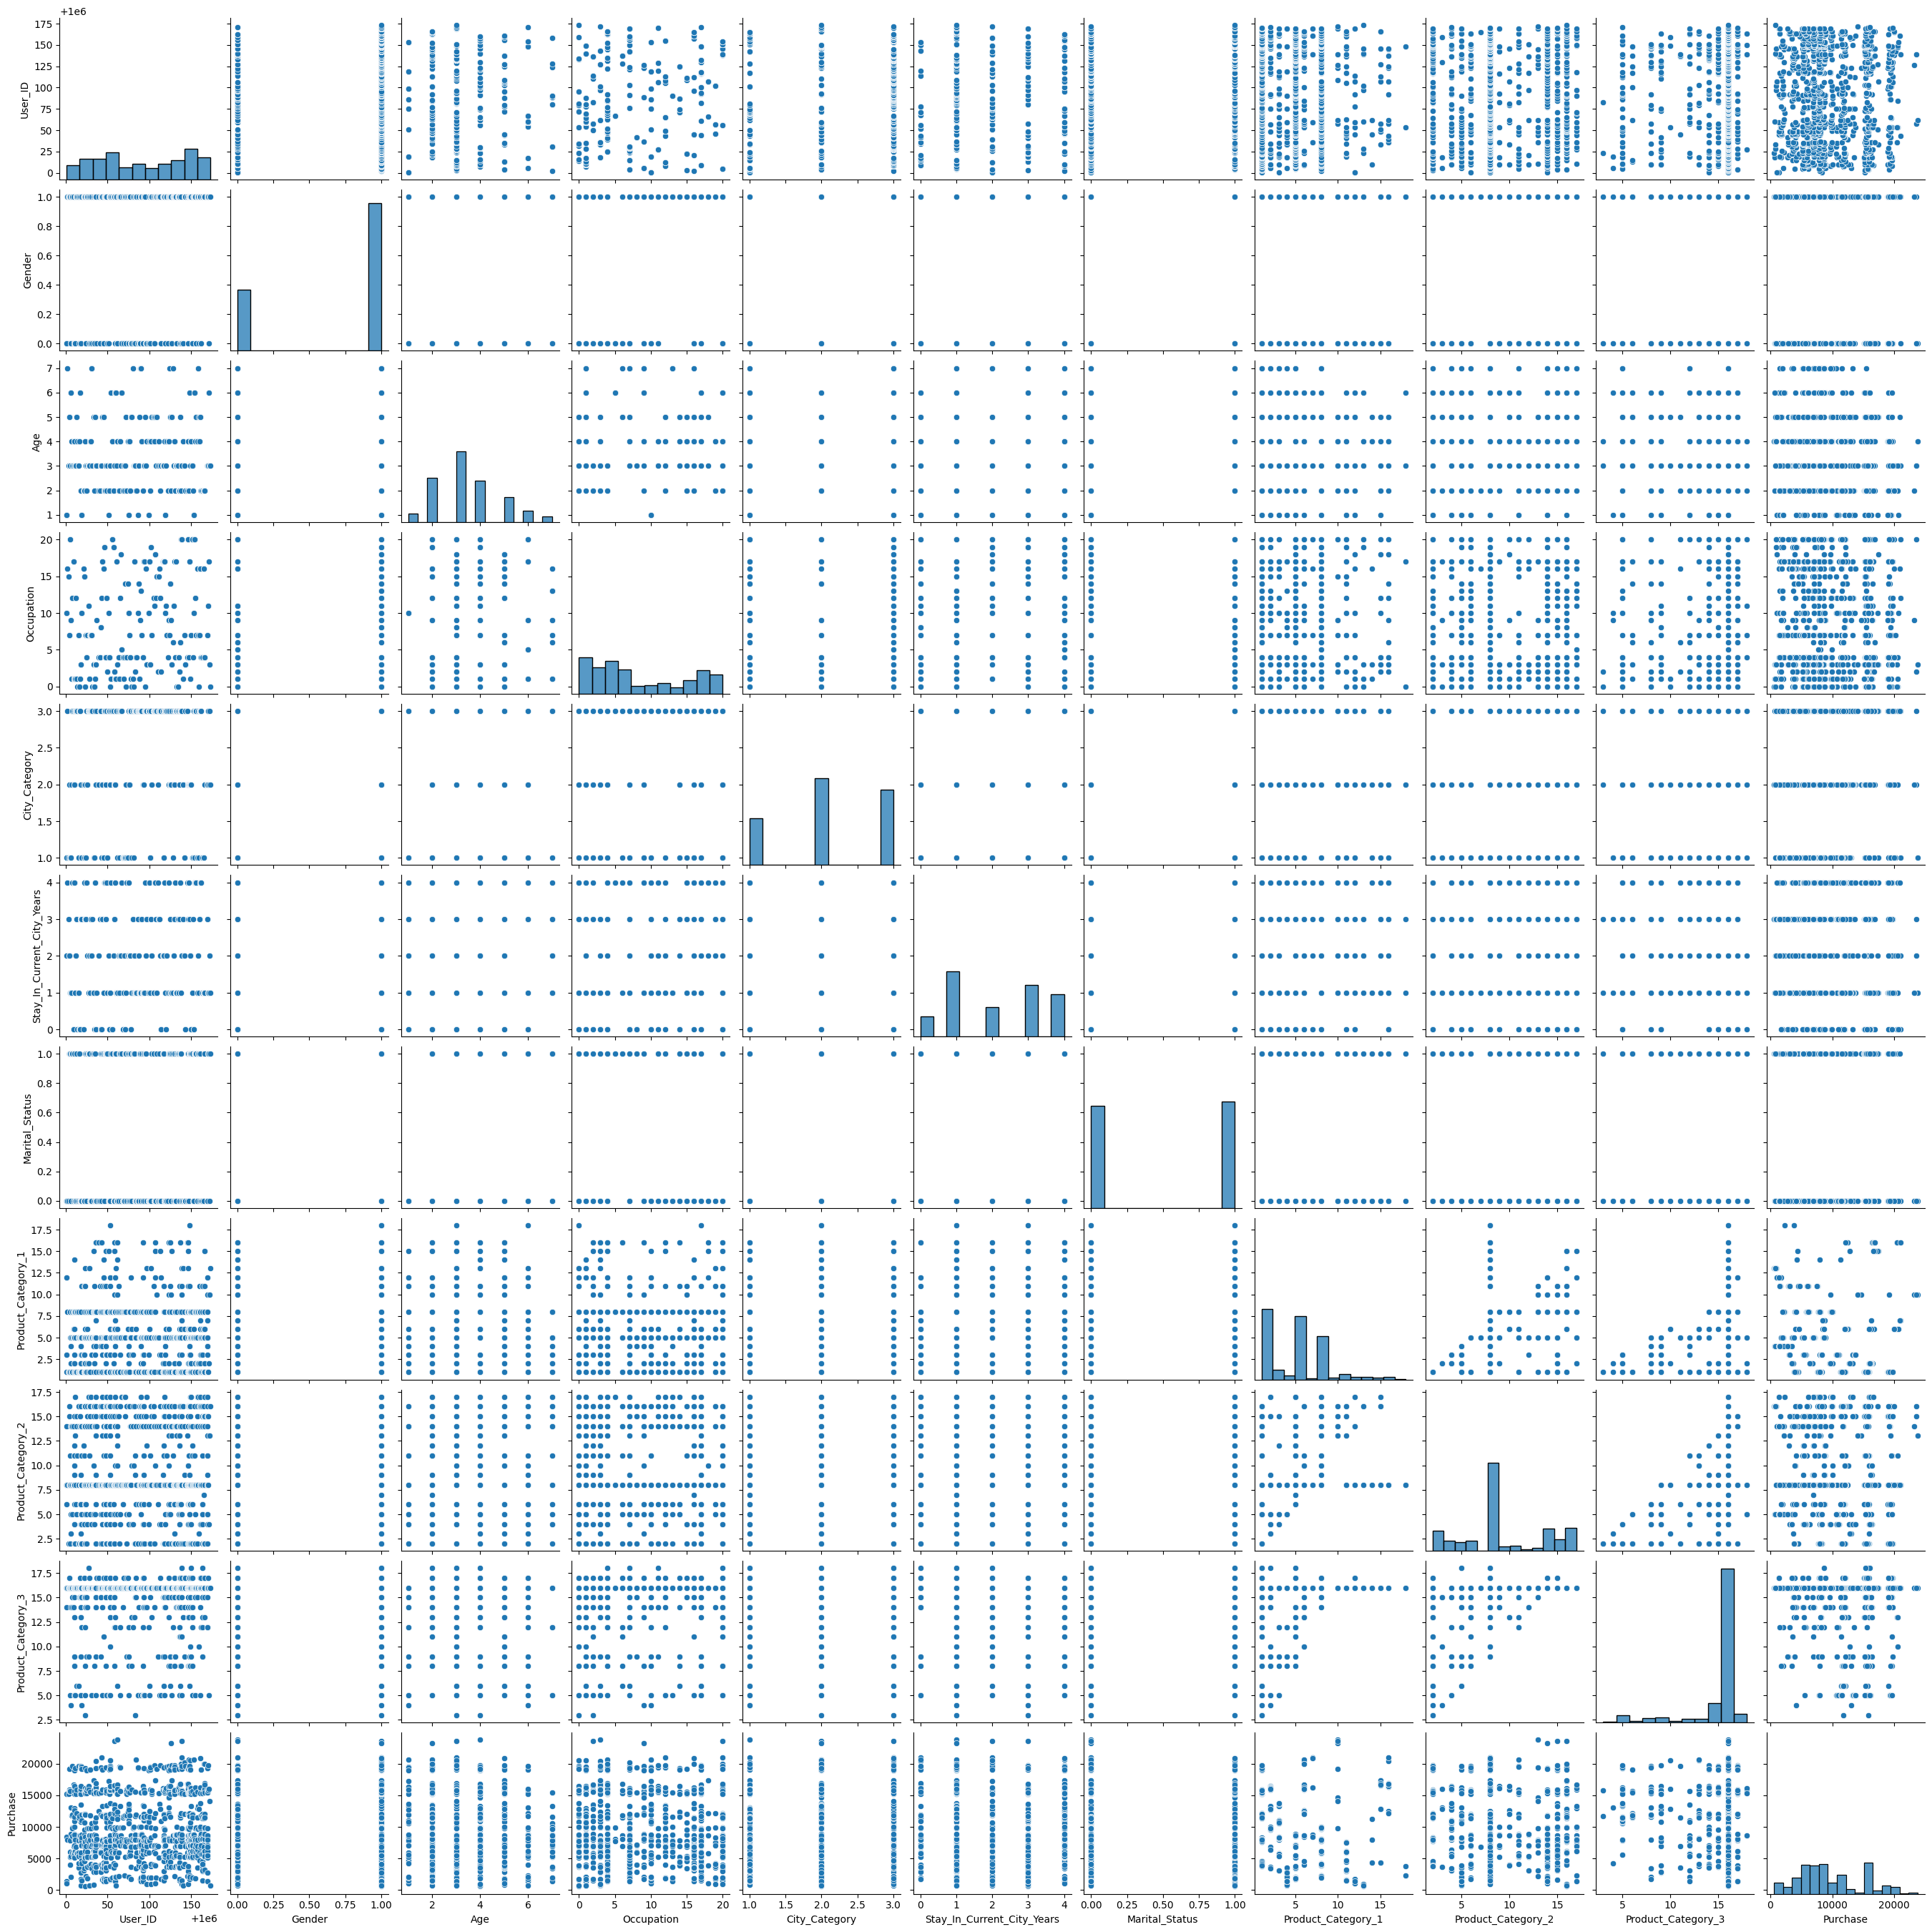

In [22]:
graph=sns.pairplot(df[:1000],palette="viridis")
plt.show()

In [23]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

C:\Users\Sanket\AppData\Local\Temp\ipykernel_19164\2280304994.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a=sns.barplot(data=df[:1000],y="City_Category",x="Age",palette=(["Pink","Skyblue"]))
C:\Users\Sanket\AppData\Local\Temp\ipykernel_19164\2280304994.py:2: UserWarning: 
The palette list has fewer values (2) than needed (7) and will cycle, which may produce an uninterpretable plot.
  a=sns.barplot(data=df[:1000],y="City_Category",x="Age",palette=(["Pink","Skyblue"]))


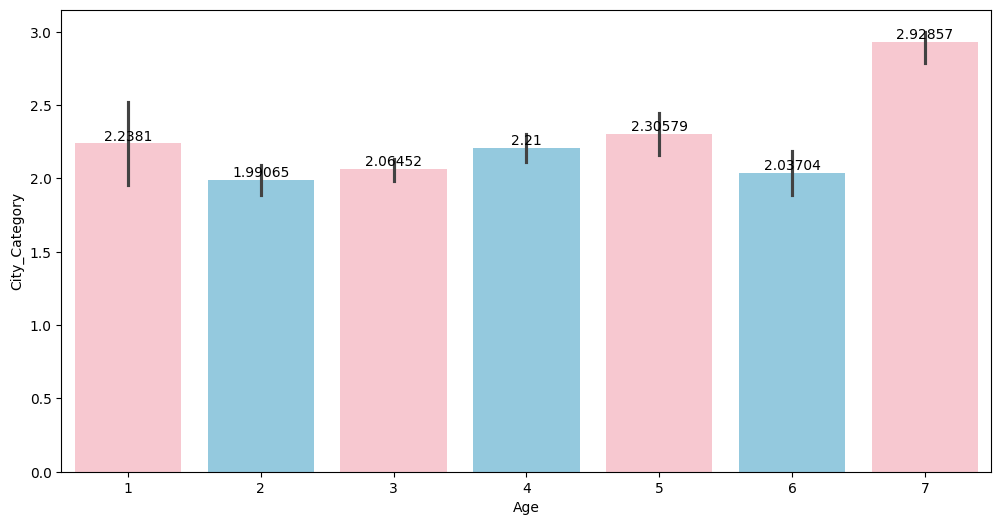

In [24]:
plt.rcParams['figure.figsize']=(12,6)
a=sns.barplot(data=df[:1000],y="City_Category",x="Age",palette=(["Pink","Skyblue"]))
for x in a.containers:
    a.bar_label(x)
plt.show()

In [25]:
df['City_Category'].unique()

array([1, 3, 2])

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


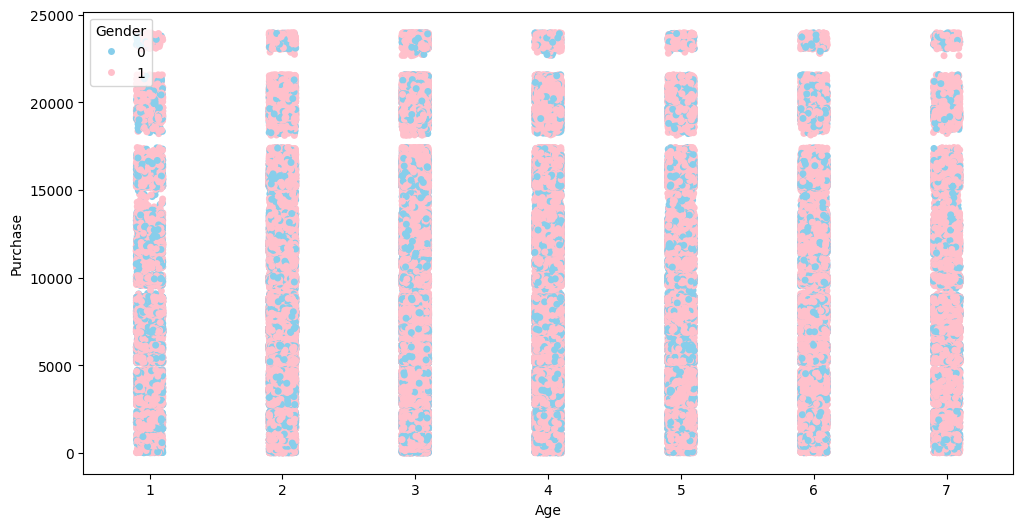

In [26]:
sns.stripplot(data=df,y="Purchase",x="Age",hue="Gender",palette=(["Skyblue","Pink"]))
plt.show()

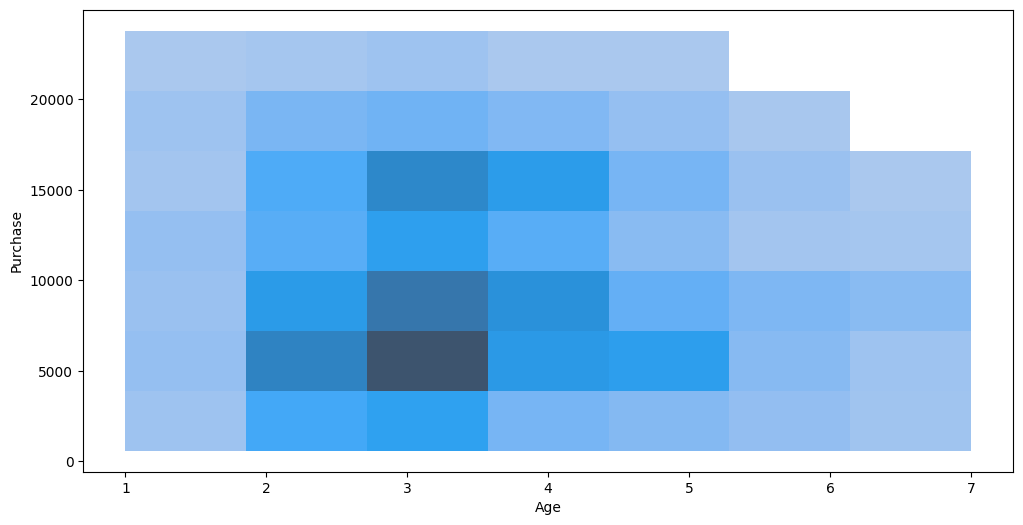

In [27]:
a=sns.histplot(data=df[:1000],y="Purchase",x="Age",bins=7)
for x in a.containers:
    a.bar_label(a)
plt.show()

C:\Users\Sanket\AppData\Local\Temp\ipykernel_19164\2298771064.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a=sns.barplot(data=df[:1000],y="Purchase",x="Age",palette="Set2")


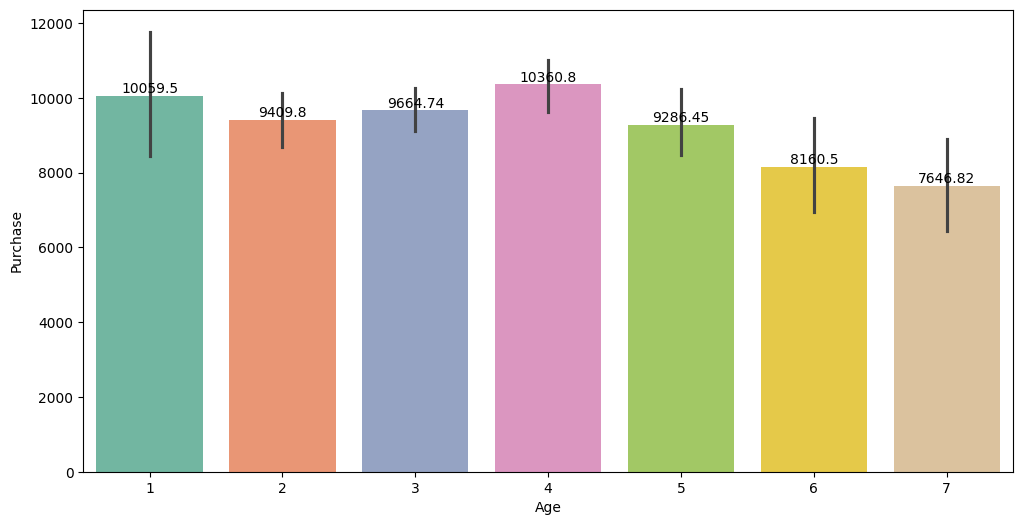

In [28]:
plt.rcParams['figure.figsize']=(12,6)
a=sns.barplot(data=df[:1000],y="Purchase",x="Age",palette="Set2")
for x in a.containers:
    a.bar_label(x)
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 12.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


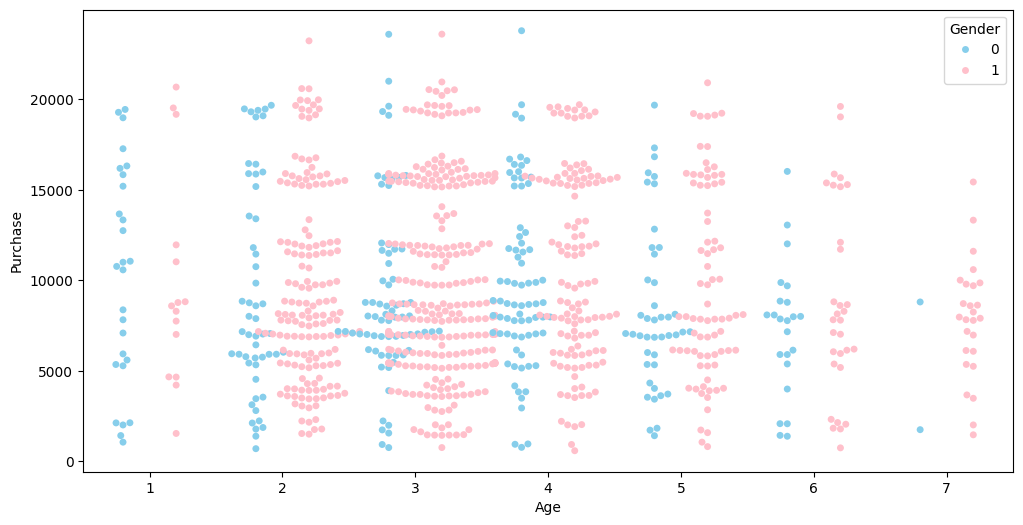

In [29]:
sns.swarmplot(data=df[:1000],y="Purchase",x="Age",hue="Gender",palette=(["Skyblue","Pink"]),dodge=True)
plt.show()

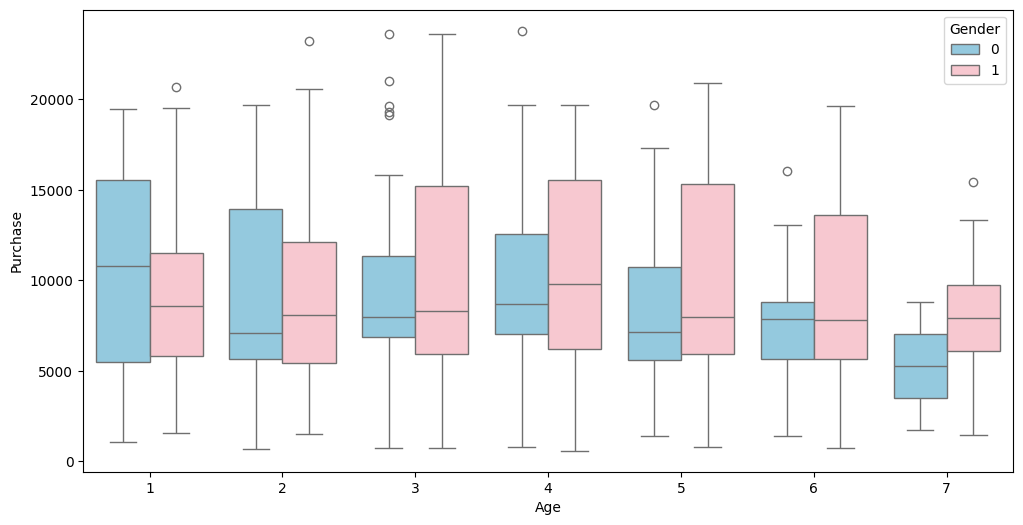

In [30]:
sns.boxplot(data=df[:1000],y="Purchase",x="Age",hue="Gender",palette=(["skyblue","pink"]))
plt.show()

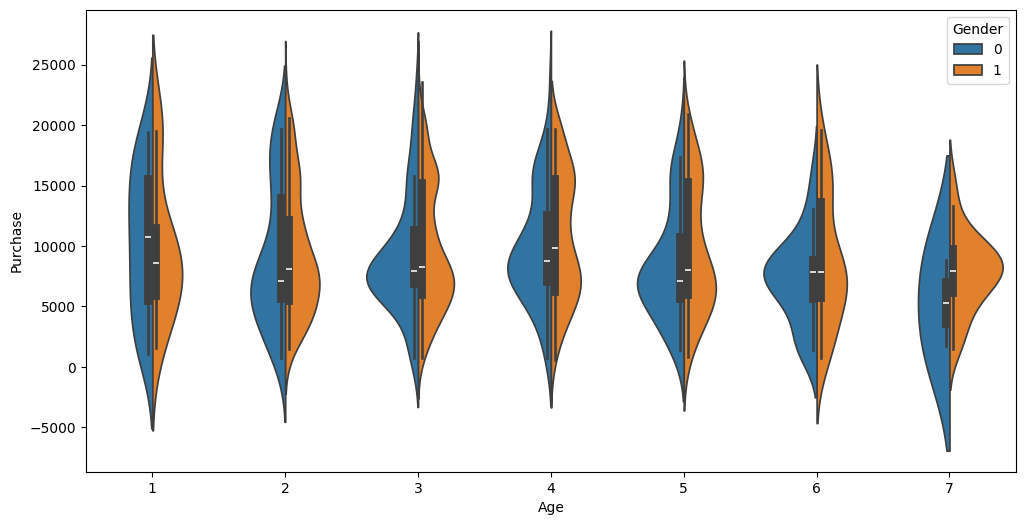

In [33]:
sns.violinplot(data=df[:1000],y="Purchase",x="Age",hue="Gender",split=True)
plt.show()

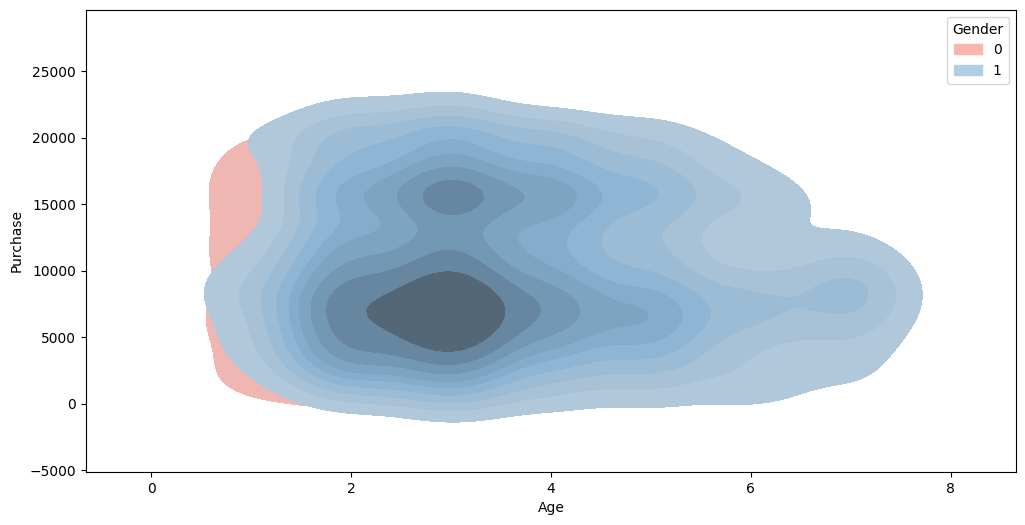

In [35]:
sns.kdeplot(data=df[:1000],y="Purchase",x="Age",hue="Gender",palette="Pastel1",fill=True)
plt.show()

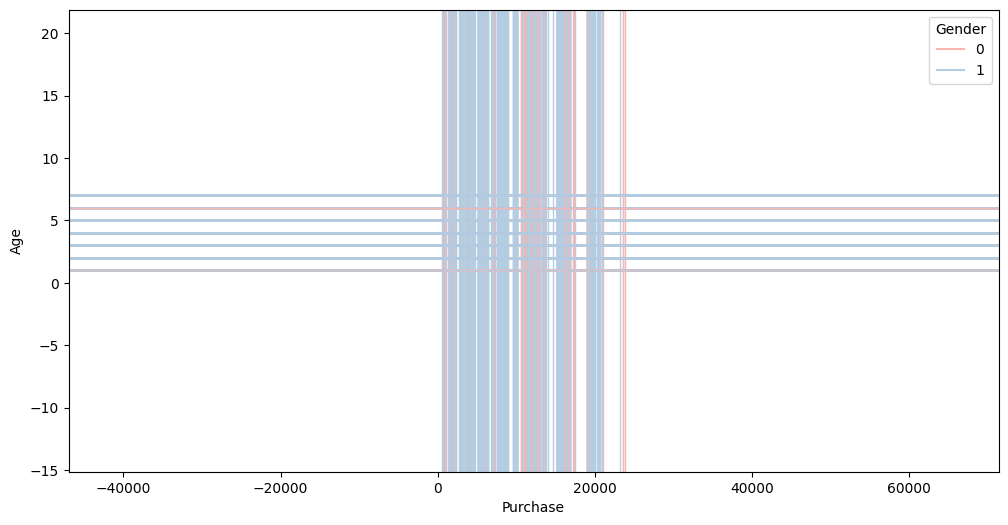

In [40]:
sns.rugplot(data=df[:1000],x="Purchase",y="Age",hue="Gender",palette="Pastel1",height=1)
plt.show()

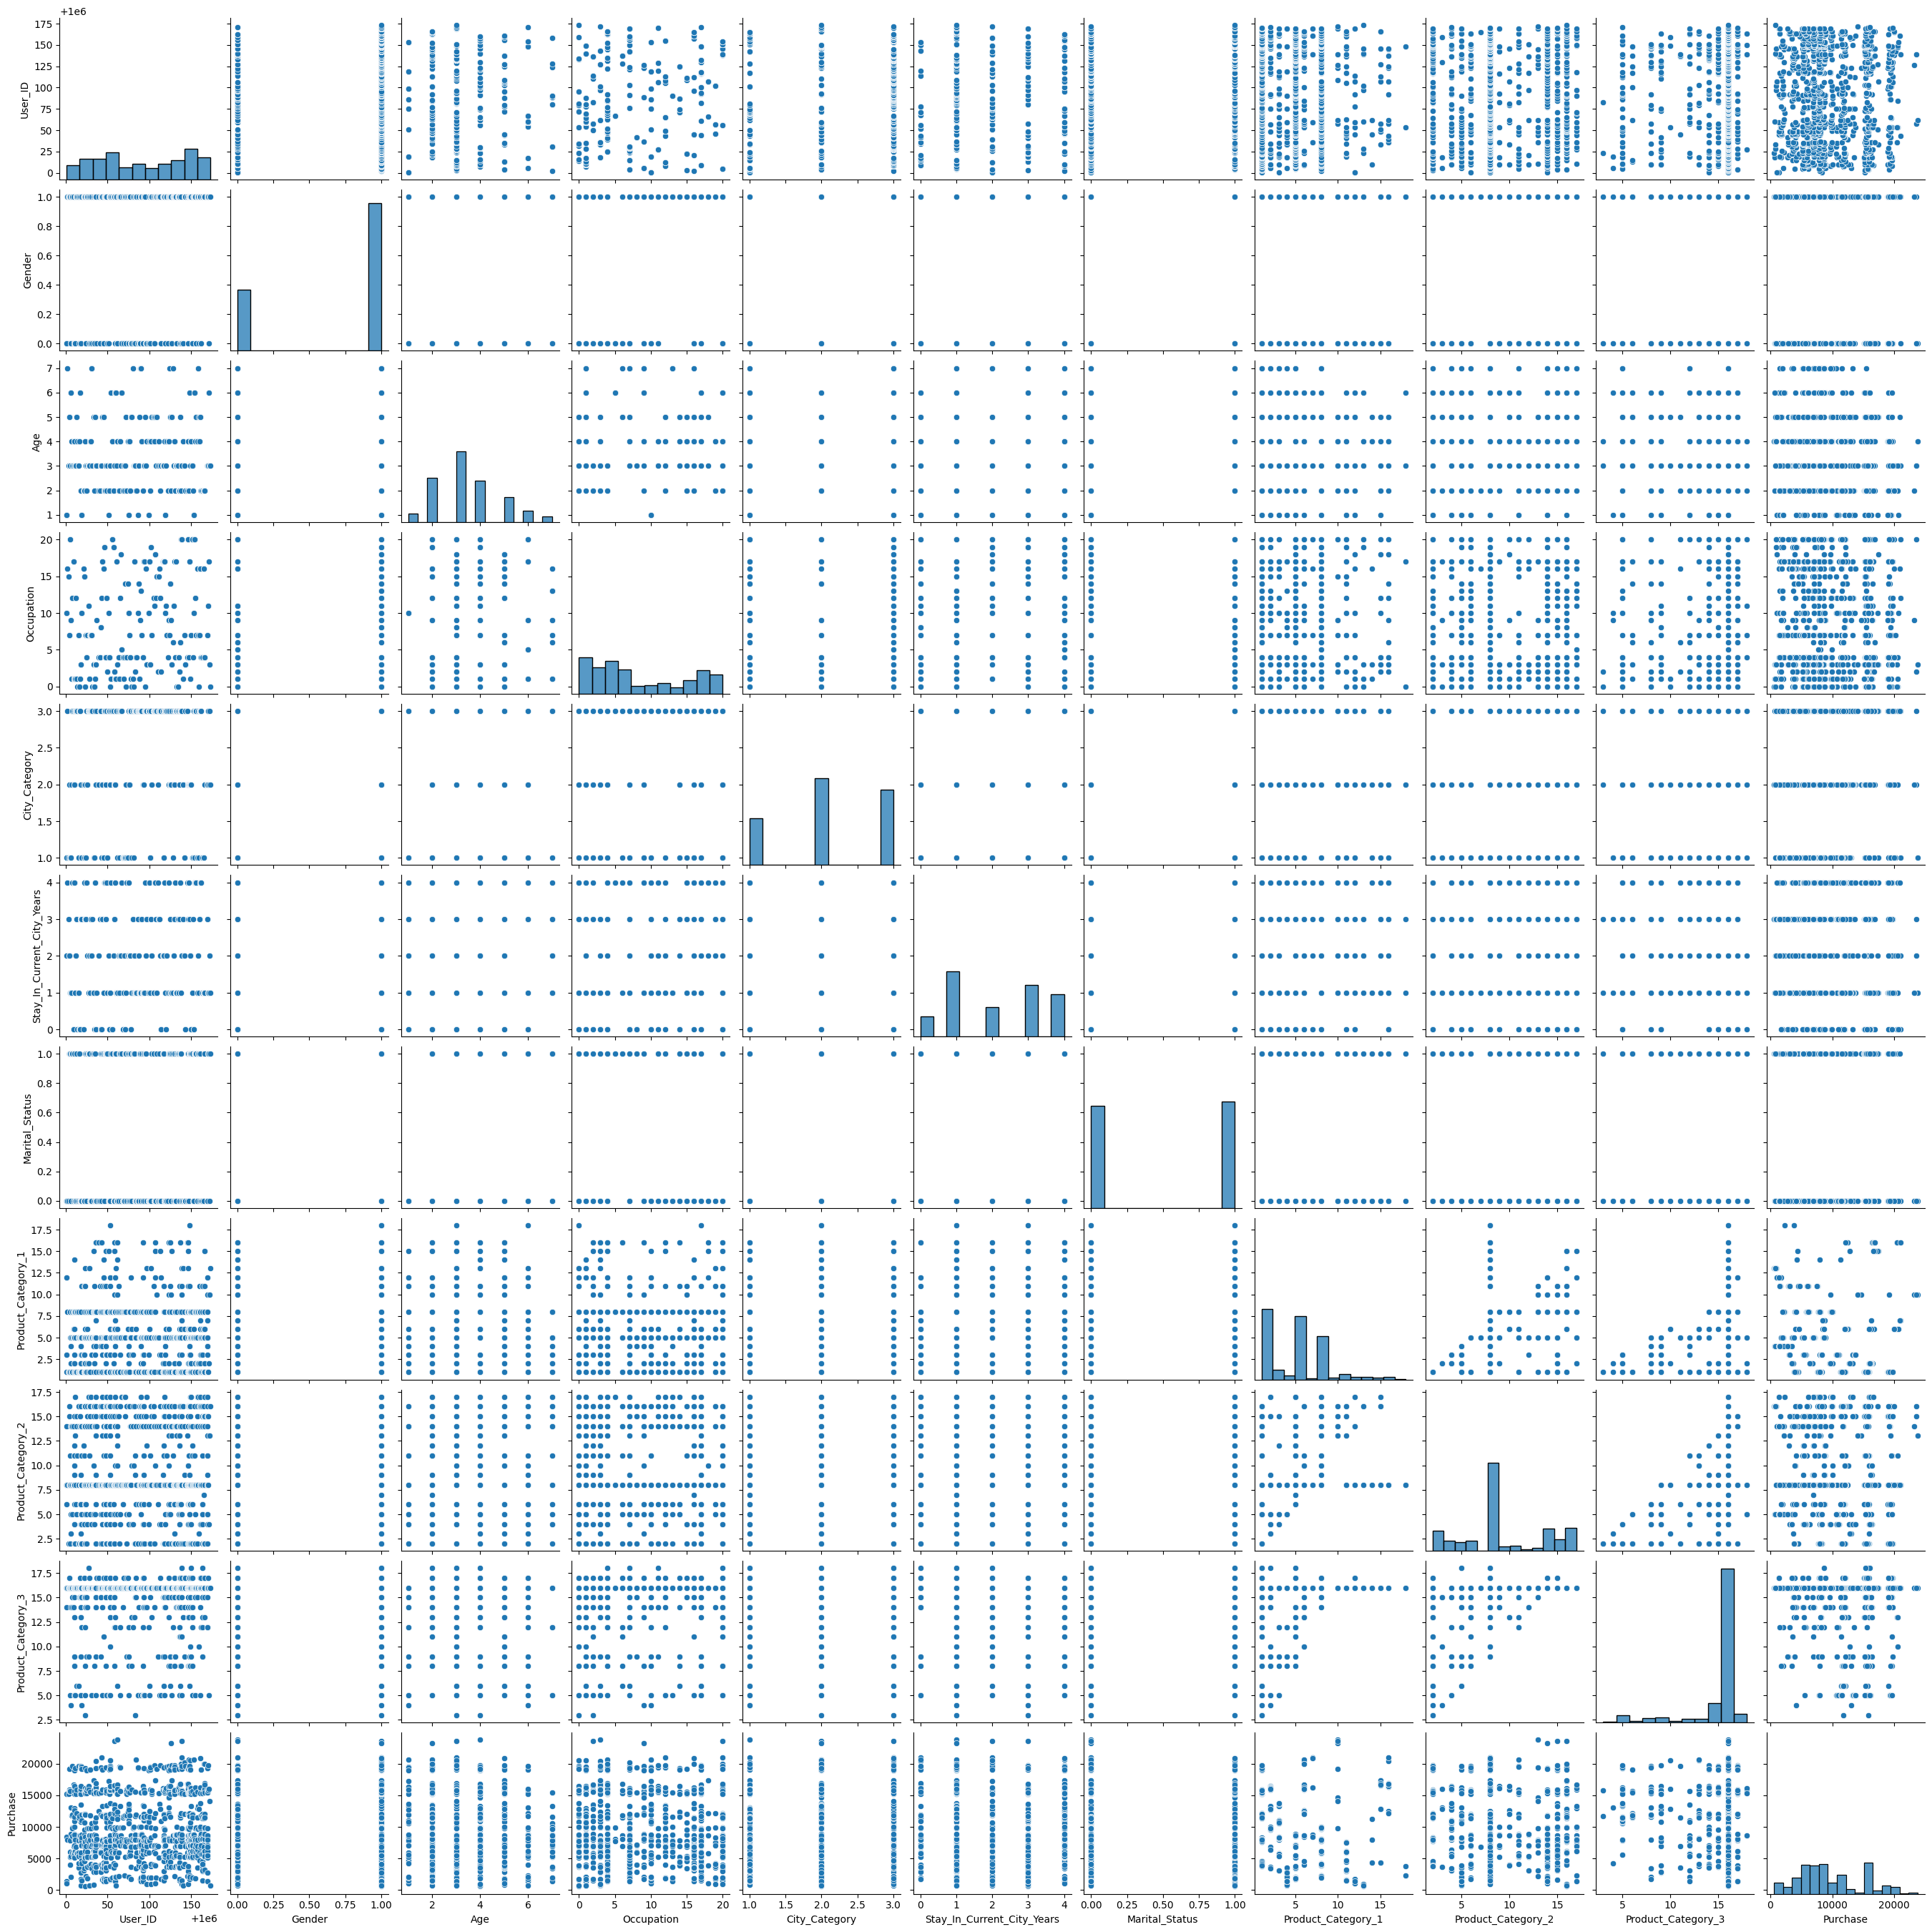

In [43]:
sns.pairplot(data=df[:1000])
plt.show()

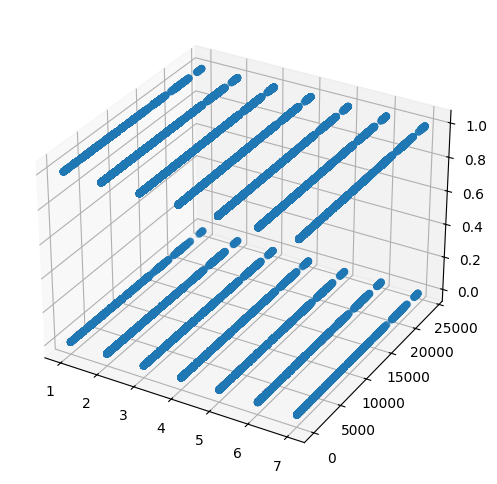

In [ ]:
ax=plt.axes(projection="3d")
ax.scatter(df["Age"],df["Purchase"],df["Gender"])
plt.show()

In [45]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')